# First steps
- Convert data to CSV and mess with it
- Use Pandas library to work with it. 
- Get an understanding of it
- Pycaret?
- https://github.com/ydataai/ydata-profiling

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/initial_features.csv')

### Getting the unique values for subjects and experimental conditions
Each combination of subject and experimental_condition creates a test.

In [3]:
df['subject'].unique()

array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 12, 13, 15, 16, 17],
      dtype=int64)

In [4]:
df['experimental_condition'].unique()

array(['Condition 2.5-15', 'Condition 2.5-10', 'Condition 2.5-5',
       'Condition 1.5-15'], dtype=object)

### Sorting means of data by subject

In [14]:
subject_summary = df.groupby(['subject', 'experimental_condition'])[['wrist_acc_mean', 'wrist_jerk_mean', 'trunk_acc_mean', 'trunk_jerk_mean', 'upperarm_acc_mean', 'upperarm_jerk_mean']].median()

#### Displaying only subject 1

In [15]:
subject_summary.loc[subject_summary.index.get_level_values('subject') == 1]

wrist_acc_mean  wrist_jerk_mean   
subject experimental_condition                                    
1       Condition 1.5-15              1.034863         5.536265  \
        Condition 2.5-10              1.029540         4.985919   
        Condition 2.5-15              1.022010         5.513176   
        Condition 2.5-5               1.007277         2.751538   

                                trunk_acc_mean  trunk_jerk_mean   
subject experimental_condition                                    
1       Condition 1.5-15              1.032276         1.558710  \
        Condition 2.5-10              1.029071         1.353798   
        Condition 2.5-15              0.995137         1.479235   
        Condition 2.5-5               1.029960         1.007367   

                                upperarm_acc_mean  upperarm_jerk_mean  
subject experimental_condition                                         
1       Condition 1.5-15                 1.064227            4.192704  
        Condition 2.5-10                 1.013566            3.207482  
        Condition 2.5-15                 1.017204            3.457017  
        Condition 2.5-5                  1.017458            2.375045

### Sample question: Which subject had the highest mean wrist acceleration?
We will be checking the experimental condition "Condition 1.5-15". 

In [16]:
subject_wrist_acc = subject_summary.loc[(subject_summary.index.get_level_values('experimental_condition') == 'Condition 1.5-15'), ['wrist_acc_mean']]
subject_wrist_acc

,,wrist_acc_mean
subject,experimental_condition,
1,Condition 1.5-15,1.034863
2,Condition 1.5-15,1.039962
3,Condition 1.5-15,1.030489
5,Condition 1.5-15,1.045693
9,Condition 1.5-15,1.039594
10,Condition 1.5-15,1.028614
12,Condition 1.5-15,1.033032
13,Condition 1.5-15,1.033205
15,Condition 1.5-15,1.076445


We can see from this table that subject 15 has the highest wrist_acc_mean.
We can also create a bar graph form this data.

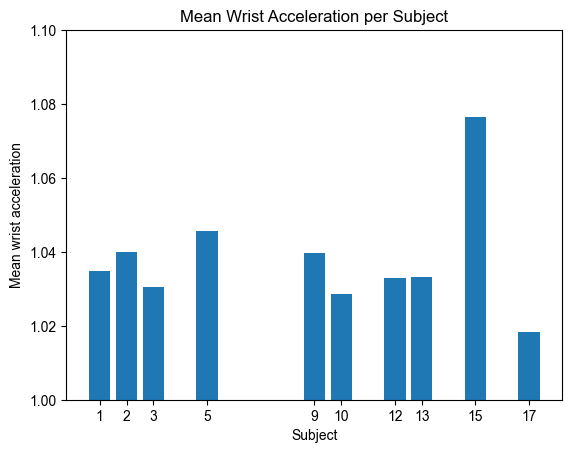

In [17]:
subjects = subject_wrist_acc.index.get_level_values('subject')
plt.bar(subjects, subject_wrist_acc['wrist_acc_mean'])
plt.xticks(subjects)
plt.ylim(bottom=1, top=1.10)

plt.style.use('seaborn-v0_8')
plt.xlabel('Subject')
plt.ylabel('Mean wrist acceleration')
plt.title('Mean Wrist Acceleration per Subject')

plt.show()


We can also plot the wrist_acc_mean data points for subject 15

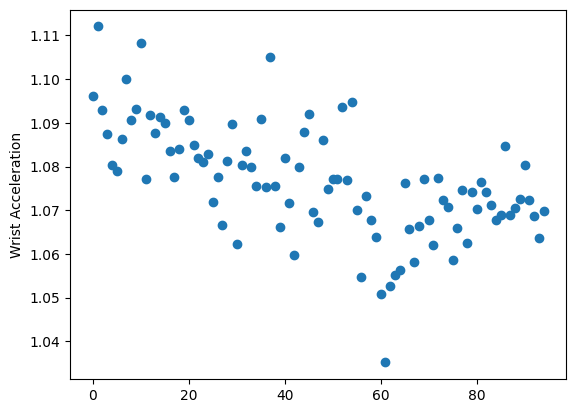

In [ ]:
subject_15_acc = df.loc[(df['subject'] == 15) & (df['experimental_condition'] == 'Condition 1.5-15'), ['wrist_acc_mean', 'trunk_acc_mean', 'upperarm_acc_mean']]
plt.scatter(range(len(subject_15_acc)), subject_15_acc['wrist_acc_mean'])
plt.ylabel('Wrist Acceleration')
plt.show()

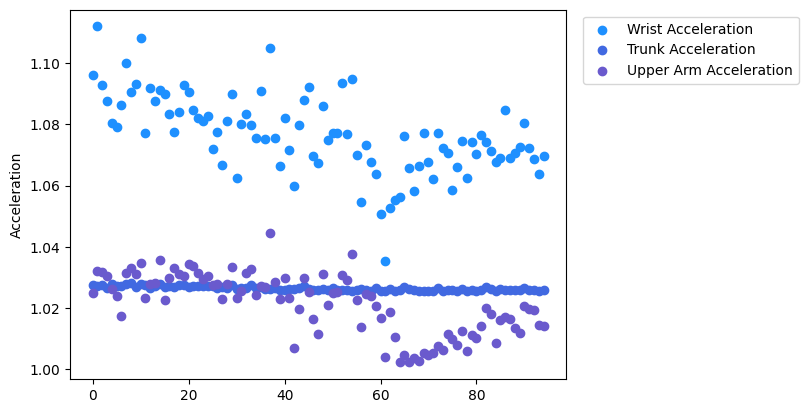

In [ ]:
# Scatter plot for wrist_acc_mean
plt.scatter(range(len(subject_15_acc)), subject_15_acc['wrist_acc_mean'], color='dodgerblue', label='Wrist Acceleration')
# Scatter plot for trunk_acc_mean
plt.scatter(range(len(subject_15_acc)), subject_15_acc['trunk_acc_mean'], color='royalblue', label='Trunk Acceleration')
# Scatter plot for upperarm_acc_mean
plt.scatter(range(len(subject_15_acc)), subject_15_acc['upperarm_acc_mean'], color='slateblue', label='Upper Arm Acceleration')

plt.ylabel('Acceleration')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()